In [1]:
import matplotlib.pyplot as plt
from collections import Counter
from termcolor import colored

import sampling as sm
import hypothesis_tests as test
import movie_sample as movies
from importlib import reload
import random
reload(test)

<module 'hypothesis_tests' from 'c:\\Users\\digitshikeb\\Desktop\\stat\\hypothesis_tests.py'>

In [2]:
filename = 'combined_data_1.csv'
df = sm.create_dataframe(filename)


In [3]:
reload(test)
movie1 = '3864' #Batman Begins
movie2 = "3925" #The matrix reloaded
result_df = test.create_paired_sample(df, movie1, movie2)


In [4]:
pop_mean1 = sm.population_mean1() #pop1 = movies before 2000
pop_mean2 = sm.population_mean2() #pop2 = movies after 2000

print(pop_mean1)
print(pop_mean2)
pop_variance1 = sm.population_variance1(pop_mean1)
pop_variance2 = sm.population_variance2(pop_mean2)
print(pop_variance1)
print(pop_variance2)

3.3051581750237733
3.1977026492827436
1.3902832177888733
1.6470592885208855


In [5]:
movies1 = movies.select_random_movies1('movie_titles.csv', 100) #array of movie ids before 2000s
movies2 = movies.select_random_movies2('movie_titles.csv', 100) #array of movie ids after 2000s
random_movies1 = list(map(str, movies1))
random_movies2 = list(map(str, movies2))
# random_for_chi2 = random.sample(random_movies1, 2)

In [6]:
filtered_df1 = df[df['movieid'].isin(random_movies1)] #dataframe containing movies given in the random movies array
filtered_df2 = df[df['movieid'].isin(random_movies2)]
print(filtered_df1)
dataset1 = filtered_df1.sample(n=100, random_state=42)['rating'].tolist()
dataset2 = filtered_df2.sample(n=100, random_state=42)['rating'].tolist()
sample_dataset1 = list(map(int, dataset1))
sample_dataset2 = list(map(int, dataset2))

dataset3 = filtered_df1.sample(n=45, random_state=42)['rating'].tolist()
dataset4 = filtered_df2.sample(n=50, random_state=42)['rating'].tolist()
sample_dataset3 = list(map(int, dataset3))
sample_dataset4 = list(map(int, dataset4))
# sample_dataset1_small = sm.get_sample(filename, random_movies1, 26)
# sample_dataset2_small = sm.get_sample(filename, random_movies2, 23)


         movieid   userid  rating        date
352693       100  2625420       1  2004-06-03
352694       100  1199825       3  2002-08-01
352695       100  2085613       2  2002-12-20
352696       100  2215923       2  2004-03-14
352697       100  1731066       5  2002-08-10
...          ...      ...     ...         ...
23805273    4440   309424       3  2004-12-08
23805274    4440  2111672       3  2003-01-03
23805275    4440  2537473       1  2003-04-21
23805276    4440  1300759       3  2004-09-30
23805277    4440  1550207       4  2004-03-12

[547308 rows x 4 columns]


In [7]:
paired_sample = result_df.sample(n=25, random_state=42)
paired_sample2 = result_df.sample(n = 20, random_state=36)
paired_sample3 = result_df.sample(n = 35, random_state=26)



In [8]:
reload(test)
small_sample1 = random.sample(sample_dataset1, 25)
small_sample2 = random.sample(sample_dataset1, 20)


# UNIT 2

### 1. One sample z-tests

In [9]:
reload(test)
null_hypothesis_mean = 3.9

print(colored("-----------------------Z-TEST 1 SAMPLE----------------------", 'white'))
# print(sample_dataset1)
print("Sample size: ", len(sample_dataset1))
print("\t\tH0: Movies before 2000 had an average rating >= %.1f"%null_hypothesis_mean)
print("\t\tHa: Movies before 2000 had an average rating < %.1f\n"%null_hypothesis_mean)


test.left_tailed_z_test(sample_dataset1, null_hypothesis_mean, pop_variance1, 0.05)
print("---------------------------------------------")
# print(sample_dataset2)
print("Sample size: ", len(sample_dataset2))
print("\t\tH0: Movies after 2000 had an average rating <= %.1f"%null_hypothesis_mean)
print("\t\tHa: Movies after 2000 had an average rating > %.1f\n"%null_hypothesis_mean)

test.right_tailed_z_test(sample_dataset2, null_hypothesis_mean, pop_variance1, 0.05)
print("---------------------------------------------")
# print(sample_dataset4)
print("Sample size: ", len(sample_dataset4))
print("\t\tH0: Movies after 2000 had an average rating = %.1f"%null_hypothesis_mean)
print("\t\tHa: Movies after 2000 had an average rating != %.1f\n"%null_hypothesis_mean)

test.two_tailed_z_test(sample_dataset4, null_hypothesis_mean, pop_variance1, 0.05)


-----------------------Z-TEST 1 SAMPLE----------------------
Sample size:  100
		H0: Movies before 2000 had an average rating >= 3.9
		Ha: Movies before 2000 had an average rating < 3.9

alpha:  0.05
z-statistic, z-critical: -0.72, -1.64
-0.72 > -1.64
left tailed test at alpha 0.05:	 Hypothesis accepted | H0: mean >= 3.9
---------------------------------------------
Sample size:  100
		H0: Movies after 2000 had an average rating <= 3.9
		Ha: Movies after 2000 had an average rating > 3.9

alpha:  0.05
z-statistic, z-critical: -3.81, 1.64
-3.81 < 1.64
right tailed test at alpha 0.05:	 Hypothesis accepted | H0: mean <= 3.9
---------------------------------------------
Sample size:  50
		H0: Movies after 2000 had an average rating = 3.9
		Ha: Movies after 2000 had an average rating != 3.9

alpha:  0.05
z-statistic, z-critical: -3.46, 1.96
| -3.46 | > 1.96
two tailed test at alpha 0.05:	 Hypothesis rejected | H0: mean = 3.9


### 2. Two sample z-test


20th century movies have same average rating as 21st century movies

H0: mean(movies relased before 2000) == mean(movies released after 2000)<br>
Ha: mean(movies relased before 2000) != mean(movies released after 2000)

In [10]:
#TEST 5 Two Sample ztest
print(colored("\n-----------------------Z-TEST 2 SAMPLE----------------------",'white'))
print(sample_dataset1)
print(sample_dataset4,'\n')
print("Sample sizes n1, n2: ", len(sample_dataset1), len(sample_dataset4))
print("\t\tH0: Movies were equally rated on average before and after year 2000")
print("\t\tHa: Movies released before and after year 2000 have different ratings\n")
test.two_sample_test(sample_dataset1, sample_dataset2, 0.05)



-----------------------Z-TEST 2 SAMPLE----------------------
[3, 4, 4, 5, 5, 4, 2, 4, 5, 4, 4, 3, 4, 3, 3, 5, 4, 3, 2, 4, 5, 3, 5, 4, 5, 3, 5, 3, 3, 4, 5, 2, 5, 4, 4, 4, 5, 5, 4, 4, 4, 3, 2, 4, 4, 5, 4, 3, 5, 2, 4, 5, 5, 5, 4, 4, 3, 3, 5, 4, 5, 4, 4, 3, 2, 5, 5, 4, 3, 2, 4, 5, 4, 1, 3, 5, 3, 3, 4, 4, 4, 5, 4, 2, 4, 3, 4, 4, 4, 3, 4, 4, 2, 5, 3, 3, 3, 2, 5, 4]
[3, 4, 4, 1, 4, 3, 4, 1, 3, 2, 3, 4, 4, 3, 2, 2, 3, 4, 5, 4, 2, 3, 3, 5, 4, 4, 3, 4, 5, 3, 3, 3, 4, 2, 4, 2, 2, 3, 3, 3, 1, 4, 5, 1, 5, 3, 4, 3, 3, 4] 

Sample sizes n1, n2:  100 50
		H0: Movies were equally rated on average before and after year 2000
		Ha: Movies released before and after year 2000 have different ratings

alpha:  0.05
z-statistic, z-critical: 2.90, 1.96
| 2.90 | > 1.96
two sample z test at alpha 0.05:	 Hypothesis rejected | H0: mean1 = mean2


### 3. One sample t-tests


In the section below we are testing our mean using small samples drawn randomly from the population

In [11]:
print("Sample ratings of movies released before 2000: ",small_sample1)
print("Sample ratings of movies released after 2000: ",small_sample2)

null_hypothesis_mean = 4.5
print(colored("\n-----------------------T-TEST----------------------",'white'))

print("\t\tH0: For movies released before 2000, mean >= %.1f"%null_hypothesis_mean)
print("\t\tHa: For movies released before 2000, mean < %.1f"%null_hypothesis_mean)
test.left_tailed_t_test(small_sample1, null_hypothesis_mean, alpha=0.05)
print('\n')

print("\t\tH0: For movies released after 2000, mean <= %.1f"%null_hypothesis_mean)
print("\t\tHa: For movies released after 2000, mean > %.1f"%null_hypothesis_mean)
test.right_tailed_t_test(small_sample2, null_hypothesis_mean, alpha=0.05)
print('\n')

print("\t\tH0: For movies released before 2000, mean = %.1f"%null_hypothesis_mean)
print("\t\tHa: For movies released before 2000, mean != %.1f"%null_hypothesis_mean)
test.two_tailed_t_test(small_sample1, null_hypothesis_mean, alpha=0.05)

Sample ratings of movies released before 2000:  [5, 3, 4, 4, 5, 2, 4, 5, 2, 5, 3, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 2, 4, 3, 4]
Sample ratings of movies released after 2000:  [3, 4, 5, 3, 4, 2, 5, 5, 5, 3, 2, 3, 4, 4, 5, 3, 4, 5, 2, 5]

-----------------------T-TEST----------------------
		H0: For movies released before 2000, mean >= 4.5
		Ha: For movies released before 2000, mean < 4.5
Sample size:  25
Degrees of freedom:  24
alpha:  0.05
t-statistic, t-critical: -3.10, -1.71
-3.10 < -1.71
left tailed t-test at alpha 0.05:	 Hypothesis rejected | H0: mean >= 4.5


		H0: For movies released after 2000, mean <= 4.5
		Ha: For movies released after 2000, mean > 4.5
Sample size:  20
Degrees of freedom:  19
alpha:  0.05
t-statistic, t-critical: -2.91, 1.73
-2.91 < 1.73
right tailed t-test at alpha 0.05:	 Hypothesis accepted | H0: mean <= 4.5


		H0: For movies released before 2000, mean = 4.5
		Ha: For movies released before 2000, mean != 4.5
Sample size:  25
Degrees of freedom:  24
alpha:  0.05

### 4. Two independent sample t-test

H0: average rating of movies before 2000 = avg rating of movies after 2000<br>
Ha: Movies released before and after year 2000 have different ratings

In [12]:
print("\t\tH0: Movies were equally rated on average before and after year 2000")
print("\t\tHa: Movies released before and after year 2000 have different avg ratings\n")
test.two_sample_t_value_test(small_sample1, small_sample2, alpha=0.01)

		H0: Movies were equally rated on average before and after year 2000
		Ha: Movies released before and after year 2000 have different avg ratings

[5, 3, 4, 4, 5, 2, 4, 5, 2, 5, 3, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 2, 4, 3, 4]
[3, 4, 5, 3, 4, 2, 5, 5, 5, 3, 2, 3, 4, 4, 5, 3, 4, 5, 2, 5]
Sample sizes:  25 20
Degrees of freedom:  43
alpha:  0.01
t-statistic, t-critical: 0.40, 2.70
| 0.40 | < 2.70
two sample t test at alpha 0.01:	 Hypothesis accepted | H0: mean1 = mean2


### 5. Two Paired Sample t-test 

<img src = "https://static.wixstatic.com/media/30d72e_9fb54b6affb44752bcf4199fdcd25d1d~mv2.jpg/v1/fill/w_1000,h_563,al_c,q_85,usm_0.66_1.00_0.01/30d72e_9fb54b6affb44752bcf4199fdcd25d1d~mv2.jpg" style="width:500px;height:300px;">
<img src = "https://m.media-amazon.com/images/S/pv-target-images/e915f8408760b928e3017d3a8b455f50a1810f25f319bf9159efe0627d812b08.jpg" style="width:500px;height:300px;">

 Our claim is users who liked 'Batman Begins' also preferred 'The Matrix: Reloaded' in the action genre.<br>
 This fact can be used to implement a reccomendation system

H0: User who liked Batman Begins also like The Matrix<br>
Ha: There is a difference in the a average likabiliy of these movies

In [13]:
reload(test)
print("\t\tH0: mean difference = 0")
print("\t\tHa: mean difference != 0\n")
test.paired_sample_t_test(paired_sample, 0.05)

		H0: mean difference = 0
		Ha: mean difference != 0

 userid  movie1  movie2  diff  diff2
 512028     3.0     4.0  -1.0    1.0
2404816     5.0     5.0   0.0    0.0
1746668     4.0     3.0   1.0    1.0
1281339     5.0     1.0   4.0   16.0
 678157     4.0     2.0   2.0    4.0
1206401     4.0     3.0   1.0    1.0
1139570     4.0     3.0   1.0    1.0
1709436     3.0     4.0  -1.0    1.0
1338374     5.0     4.0   1.0    1.0
2603779     5.0     4.0   1.0    1.0
 671576     4.0     5.0  -1.0    1.0
1248340     4.0     3.0   1.0    1.0
2467154     2.0     3.0  -1.0    1.0
 822193     4.0     3.0   1.0    1.0
  32147     5.0     4.0   1.0    1.0
  92659     5.0     3.0   2.0    4.0
 718709     5.0     4.0   1.0    1.0
2060093     4.0     2.0   2.0    4.0
2316974     4.0     3.0   1.0    1.0
1129235     5.0     5.0   0.0    0.0
 366683     5.0     4.0   1.0    1.0
1206376     4.0     3.0   1.0    1.0
1019933     4.0     3.0   1.0    1.0
2342897     5.0     4.0   1.0    1.0
2099530     5.0     4

### 6. Proportion Test: 1 Sample


H0: Proportion of movies released after 2000 rated 4 is 50%<br>
Ha: p != 0.5

In [14]:
reload(test)
null_hypothesis_prop = 0.5
rating = 4
print("\t\tH0: for rating %d, p = %.2f"%(rating, null_hypothesis_prop))
print("\t\tHa: for rating %d, p != %.2f"%(rating, null_hypothesis_prop))
test.proportion_test_one_sample(sample_dataset3, rating, null_hypothesis_prop, 0.05)

		H0: for rating 4, p = 0.50
		Ha: for rating 4, p != 0.50
Sample size:  45
np = 22.50, nq = 22.50

sample proportion: 0.42
alpha:  0.05
z-statistic, z-critical: -1.04, 1.96
|-1.04| < 1.96
one sample proportion test at alpha 0.05:	 Hypothesis accepted | H0: p = 0.50


### 7. Proportion Test: Two Sample

In [15]:
reload(test)
rating = 4
print("\t\tH0: for rating %d, p1 >= p2"%(rating))
print("\t\tHa: for rating %d, p1 < p2"%(rating))

test.proportion_test_two_sample(sample_dataset3, sample_dataset4, rating, 0.05)

		H0: for rating 4, p1 >= p2
		Ha: for rating 4, p1 < p2
Sample size 1:  45
Sample size 2:  50
n1p, n1q, n2p, n2q = 16.58, 28.42, 18.42, 31.58

Sample proportions: 0.42, 0.32
alpha:  0.05
z-statistic, z-critical: 1.03, 1.96
two sample proportion test at alpha 0.05:	 Hypothesis accepted | H0: p1 < p2


# UNIT 3

### 1. Runs Test


In [16]:
reload(test)
null_hypothesis_median = 4
print("\t\tRUNS TEST FOR RANDOMNESS OF THE SAMPLE")
print("H0: The sample is random")
print("Ha: The sample is not random")
test.runs_test(small_sample2, 0.05)
print(small_sample2)

		RUNS TEST FOR RANDOMNESS OF THE SAMPLE
H0: The sample is random
Ha: The sample is not random
Median:  4.0
Runs data: 
B, A, B, B, A, A, A, B, B, B, A, B, A, B, A, 
Number of runs:  10
A:  7
B:  8
alpha:  0.05
Critical range:  (4, 13)
Result at alpha = 0.05: The sample is random
[3, 4, 5, 3, 4, 2, 5, 5, 5, 3, 2, 3, 4, 4, 5, 3, 4, 5, 2, 5]


### 2. Sign Test: One Sample

Our claim is that the median ratings of 20th century movies was 4

H0: Movies before 2000 have median = 4 <br>
Ha: Median != 4


In [17]:
reload(test)
null_hypothesis_median = 4

print("----------------------------------------")
print("\t\tSIGN TEST FOR THE HYPOTHESIS:")
print("H0: Median = %.1f"%null_hypothesis_median)
print("Ha: Median < %.1f"%null_hypothesis_median)
# print(sample_dataset1)
test.sign_test_one_sample(sample_dataset1, null_hypothesis_median, 0.01)
print("----------------------------------------")


----------------------------------------
		SIGN TEST FOR THE HYPOTHESIS:
H0: Median = 4.0
Ha: Median < 4.0
['-', '0', '0', '+', '+', '0', '-', '0', '+', '0', '0', '-', '0', '-', '-', '+', '0', '-', '-', '0', '+', '-', '+', '0', '+', '-', '+', '-', '-', '0', '+', '-', '+', '0', '0', '0', '+', '+', '0', '0', '0', '-', '-', '0', '0', '+', '0', '-', '+', '-', '0', '+', '+', '+', '0', '0', '-', '-', '+', '0', '+', '0', '0', '-', '-', '+', '+', '0', '-', '-', '0', '+', '0', '-', '-', '+', '-', '-', '0', '0', '0', '+', '0', '-', '0', '-', '0', '0', '0', '-', '0', '0', '-', '+', '-', '-', '-', '-', '+', '0']
Sample size:  100
alpha:  0.01
z-statistic, z-critical: 1.42, 2.58
one sample sign test at alpha 0.01:	 Hypothesis accepted | H0: median=4.0
----------------------------------------


### 3. Sign Test: Paired Sample

 Our claim is users who liked 'Batman Begins' also preferred 'The Matrix: Reloaded' in the action genre.

H0: User who liked Batman Begins also like The Matrix<br>
Ha: There is a difference in the a average likabiliy of these movies

In [18]:
reload(test)

test.sign_test_paired_sample(paired_sample, 0.05)


 userid  movie1  movie2 diff
 512028     3.0     4.0    -
2404816     5.0     5.0    0
1746668     4.0     3.0    +
1281339     5.0     1.0    +
 678157     4.0     2.0    +
1206401     4.0     3.0    +
1139570     4.0     3.0    +
1709436     3.0     4.0    -
1338374     5.0     4.0    +
2603779     5.0     4.0    +
 671576     4.0     5.0    -
1248340     4.0     3.0    +
2467154     2.0     3.0    -
 822193     4.0     3.0    +
  32147     5.0     4.0    +
  92659     5.0     3.0    +
 718709     5.0     4.0    +
2060093     4.0     2.0    +
2316974     4.0     3.0    +
1129235     5.0     5.0    0
 366683     5.0     4.0    +
1206376     4.0     3.0    +
1019933     4.0     3.0    +
2342897     5.0     4.0    +
2099530     5.0     4.0    +
Sample size:  25
alpha:  0.05
critical value: 6
calculated score: 4
paired sign test at alpha 0.05:		 Hypothesis rejected | H0: mean difference=0.0


### 4. Wilcoxon Rank Sum Test

Our claim is that there is movies in the 20th century were more entertaining than the movies in the 21st century

H0: There is <b>no difference</b> in the average ratings of movies before and after 2000 <br>
Ha: There is a significant difference


In [19]:
reload(test)
print("Group A: released < 2000\tGroup B: released >= 2000\n")
test.wilcoxon_ran_sum_test(small_sample1, small_sample2, 0.05)

Group A: released < 2000	Group B: released >= 2000

rating    2    2    2    2    2    2     3     3     3     3     3     3     3     3     4     4     4     4     4     4     4     4     4     4     4     4     4     4     4     4     4     5     5     5     5     5     5     5     5     5     5     5     5     5     5
group     B    B    A    B    A    A     B     A     B     A     B     B     B     A     B     A     B     A     A     A     B     A     A     A     A     B     A     A     A     A     B     B     B     A     B     B     B     A     A     A     A     A     A     B     B
rank    3.5  3.5  3.5  3.5  3.5  3.5  10.5  10.5  10.5  10.5  10.5  10.5  10.5  10.5  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  23.0  38.5  38.5  38.5  38.5  38.5  38.5  38.5  38.5  38.5  38.5  38.5  38.5  38.5  38.5 

Rank Sum =  587.5
n1 =  25
n2 =  20
alpha:  0.05
z-statistic, z-critical: 0.29, 1.96
Wilcoxon rank sum test at alpha 0.05: Hypothesis

### 5. Wilcoxon Signed-rank Test

 Our claim is users who liked 'Batman Begins' also preferred 'The Matrix: Reloaded' in the action genre.<br>
 This fact can be used to implement a reccomendation system

H0: User who liked Batman Begins also like The Matrix<br>
Ha: There is a difference in the a average likabiliy of these movies

In [20]:
reload(test)
test.wilcoxon_signed_rank_test(paired_sample3, 0.05)


Sample size:  35
 userid  movie1  movie2  diff  abs_diff  rank  signed_rank
1682724     5.0     3.0   2.0       2.0  19.5         19.5
1141193     5.0     2.0   3.0       3.0  23.5         23.5
1667288     2.0     3.0  -1.0       1.0   9.0         -9.0
 996592     4.0     3.0   1.0       1.0   9.0          9.0
1473595     5.0     4.0   1.0       1.0   9.0          9.0
2123141     4.0     5.0  -1.0       1.0   9.0         -9.0
1043067     4.0     3.0   1.0       1.0   9.0          9.0
2280287     5.0     2.0   3.0       3.0  23.5         23.5
 924504     5.0     4.0   1.0       1.0   9.0          9.0
  21652     5.0     2.0   3.0       3.0  23.5         23.5
1443041     4.0     3.0   1.0       1.0   9.0          9.0
1233091     5.0     2.0   3.0       3.0  23.5         23.5
 811545     5.0     1.0   4.0       4.0  26.0         26.0
1270517     4.0     3.0   1.0       1.0   9.0          9.0
 497944     5.0     3.0   2.0       2.0  19.5         19.5
 363680     3.0     2.0   1.0       1.0

# UNIT 4

In [21]:
reload(test)
test.chi_square_good_fit_test(filtered_df1, random_movies1, 0.05)


-----------------------Contingency Table----------------------
movieid   186  3079  4012  4059  4305
Category                             
Bad         0     0     3     5     1
Good       10    10     7     5     9
degrees of freedom: 4


dof:  4
alpha:  0.05
Chi-square Statistic: 2.2926829268292686
Critical Value: 14.86


Fail to reject the null hypothesis. There is not enough evidence of preference by users for particular movies.


In [22]:
reload(test)
test.chi_square_independence_test(filtered_df1, random_movies1, 0.05)

-----------------------Observed Table----------------------

movieid   3764  908
Category           
Bad          5    0
Good         5   10
-----------------------Expected Table----------------------

movieid   3764  908
Category           
Bad        2.5  2.5
Good       7.5  7.5
Degrees of freedom: 1 

Chi-square Statistic: 6.666666666666666
Critical Value: 3.841458820694124
Reject the null hypothesis. There is a no association on movie being good and released on a particular year


In [23]:
reload(test)
test.chi_square_homogenity_test(filtered_df1, random_movies1, 0.05)

-----------------------Observed Table----------------------

movieid   1992  3009  3710
Category                  
Bad          3     1     2
Good         7     9     8
-----------------------Expected Table----------------------

movieid   1992  3009  3710
Category                  
Bad        2.0   2.0   2.0
Good       8.0   8.0   8.0
Degrees of freedom: 2 

Chi-square Statistic: 1.25
Critical Value: 5.991464547107979
Fail to reject the null hypothesis.The proportion of good and bad ratings for all 3 movies released in a particular is same


In [24]:
reload(test)
test.two_by_two_contingency_test(filtered_df1, random_movies1, 0.05)
#have to decide with hypothesis

-----------------------Observed Table----------------------

movieid   228  3833
Category           
Bad         3     3
Good        7     7
There is a value less than 5 so Yates Correction test need to be applied


# UNIT 5

### 1. Sample Size: One Sample

What is the minimum sample size required to estimate the average user ratings of movies in the dataset at a 95% confidence level, with a margin of error less than 0.5 points, assuming a standard deviation of user ratings of 1.5 points

In [25]:
import math

z = 1.96  # for a 95% confidence level
s = 1.5    #std deviation
d = 0.5    #margin of error

# Calculate minimum sample size using the formula
min_sample_size = math.ceil((z * s/ d)**2)

# Display the minimum sample size
print("Minimum Sample Size:", min_sample_size)


Minimum Sample Size: 35


### 2. Sample size for Samples with Proportion

A researcher is interested in estimating the difference in the proportion of users giving positive ratings to two different genres of movies. Based on preliminary data, the researcher believes that the difference in proportions is around 0.1. Compute the minimum sample size required at a confidence level of 95%, accepting a difference of up to 5% of the true population, to estimate the proportion of users favoring one movie genre over the other

In [26]:
import math

# Researcher's values
z = 1.96  # for a 95% confidence level
p = 0.1  #proportion
d = 0.05 #difference

# Calculate minimum sample size using the formula
min_sample_size = math.ceil((z**2 * p * (1 - p)) / d**2)

# Display the minimum sample size
print("Minimum Sample Size:", min_sample_size)


Minimum Sample Size: 139


### 3. Sample size : two samples

 We are interested in comparing the average user ratings of movies between two genres. The researcher aims to determine the minimum sample size required to detect a difference of 0.5 or more points with a significance level (α) of 0.05 and a power of 90%, assuming a standard deviation (σ) of 1.5 points.

In [27]:
import math

# Given values
sd = 1.5
za = 1.96
zb = 1.282
d = 0.5

# Calculate total sample size
N = (4 * sd**2 * (za + zb)**2) / d**2

# Calculate individual sample sizes
sample_size_1 = math.ceil(N / 2)
sample_size_2 = math.ceil(N / 2)

# Display the results
print("z(1-a/2) is:", za)
print("z(1- β) is:", zb)
print("Desired Difference (d) is:", d)
print("Total sample size required is:", N)
print("Sample size 1 is:", sample_size_1)
print("Sample size 2 is:", sample_size_2)


z(1-a/2) is: 1.96
z(1- β) is: 1.282
Desired Difference (d) is: 0.5
Total sample size required is: 378.380304
Sample size 1 is: 190
Sample size 2 is: 190


### 4. Sample size for two samples with proportions

It is observed that 45% of users in one movie genre consistently give high ratings, while only 20% of users in another genre show a similar trend. To investigate whether this observed difference is statistically significant, the researcher aims to determine the minimum sample sizes needed from each group. The significance level (α) is set at 0.05, and the researcher desires a power (1 - β) of 80% to detect the difference if it exists.

In [28]:
import math

# Given values
alpha = 0.05
beta = 0.1
p1 = 0.45  # Proportion in states reporting COVID-19 cases
p2 = 0.20  # Proportion in other regions
d = p1 - p2

# Z-values for alpha and beta
z_alpha = 1.96
z_beta = 1.282

# Calculating required sample size
prop = ((p1 + p2) / 2) * (1 - ((p1 + p2) / 2))
N = 4 * prop * (z_alpha + z_beta)**2 / d**2

# Displaying the results
print("alpha =", alpha)
print("beta:", beta)
print("p1:", p1)
print("p2:", p2)
print("d:", d)
print("z(1-a/2):", z_alpha)
print("z(1-β):", z_beta)
print("Total sample size required is:", math.ceil(N))
print("Sample size 1 is:", math.ceil(N / 2))
print("Sample size 2 is:", math.ceil(N / 2))


alpha = 0.05
beta: 0.1
p1: 0.45
p2: 0.2
d: 0.25
z(1-a/2): 1.96
z(1-β): 1.282
Total sample size required is: 148
Sample size 1 is: 74
Sample size 2 is: 74


# THANK YOU

# EXTRA STUFF

3.59943371
3.6
ModeResult(mode=3.595, count=1185)


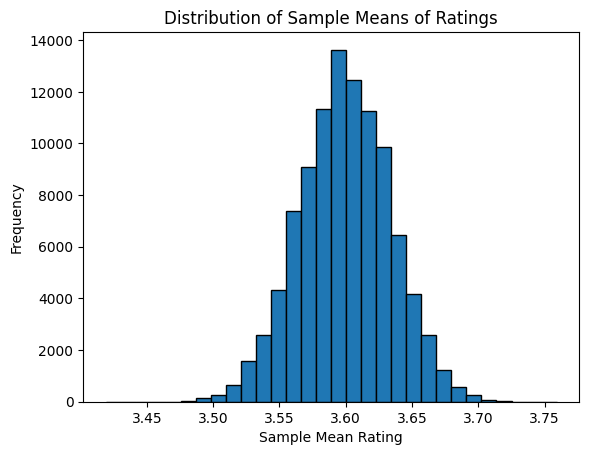

Kurtosis: 0.005280048704783713
Skewness: -0.024257589110647584


In [29]:

import sampling as sm

# Replace 'rating_column' with the actual column name containing ratings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from scipy.stats import mode


# Assuming you have a DataFrame named 'df' with columns 'movieid', 'userid', 'rating', 'date'

# Generate 1000 random samples of size n from the dataframe
n_samples = 100000
sample_means = []

for _ in range(n_samples):
    sample = df['rating'].sample(n=1000, replace=True)  # Adjust the fraction as needed
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
print(np.mean(sample_means))
print(np.median(sample_means))
print(mode(sample_means))

# Plot the distribution of sample means
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title('Distribution of Sample Means of Ratings')
plt.xlabel('Sample Mean Rating')
plt.ylabel('Frequency')
plt.show()

kurt = kurtosis(sample_means)
skewness = skew(sample_means)

print(f'Kurtosis: {kurt}')
print(f'Skewness: {skewness}')

